In [20]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

fetching images count from the folders

In [2]:
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images') 
    count = count + len(files)
print('Images folder has '+ str(count) + ' Images')

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images folder has 4317 Images


load images into arrays as dataset

In [3]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                        seed=123,
                                                        validation_split=0.2,
                                                        subset='training',
                                                        batch_size=batch,
                                                        image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                        seed=123,
                                                        validation_split=0.2,
                                                        subset='validation',
                                                        batch_size=batch,
                                                        image_size=(img_size,img_size))
                                                        

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [5]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [6]:
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


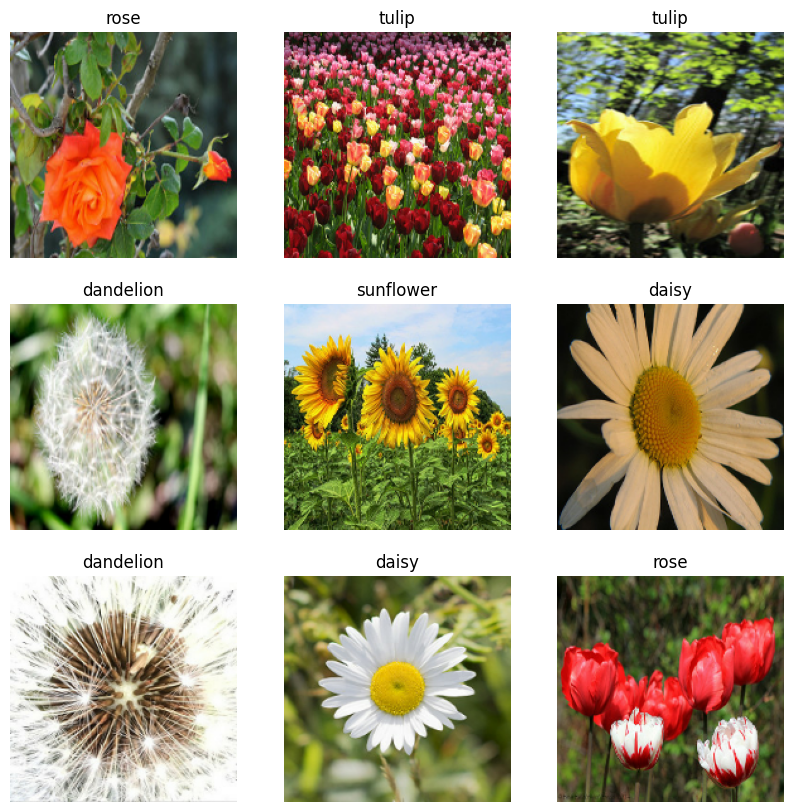

In [7]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')
    

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)

data augementation

In [21]:
data_augmentation = Sequential([
    layers.Input(shape=(img_size, img_size, 3)),
    layers.RandomFlip('horizontal', input_shape= (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


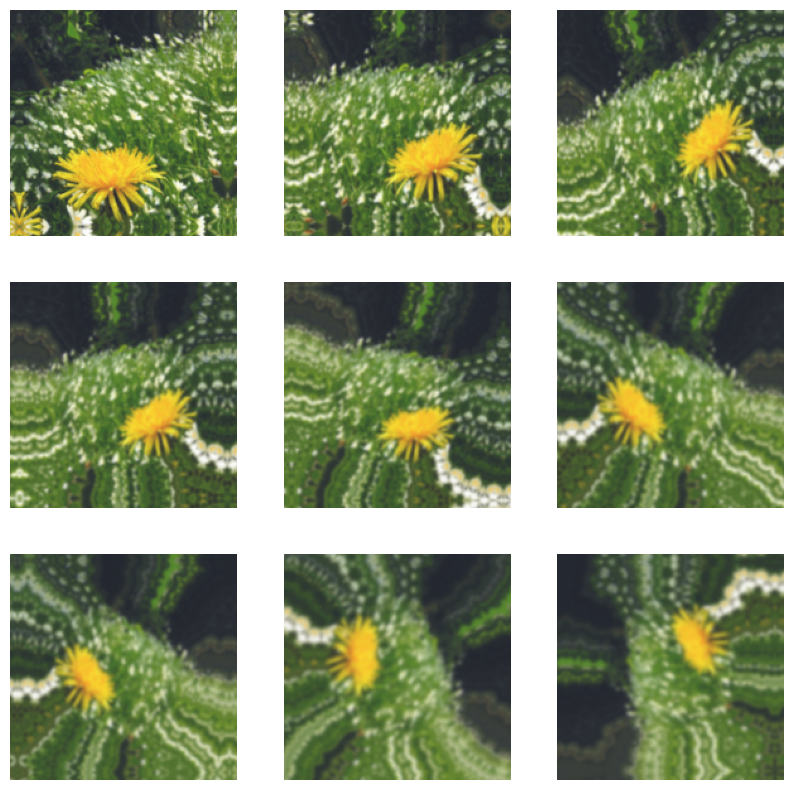

In [19]:

i = 0

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')
    

model creation

In [24]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32,3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64,3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [27]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 482ms/step - accuracy: 0.8186 - loss: 0.4906 - val_accuracy: 0.7231 - val_loss: 0.8159
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.8128 - loss: 0.4835 - val_accuracy: 0.7265 - val_loss: 0.8100
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 57s 530ms/step - accuracy: 0.8354 - loss: 0.4382 - val_accuracy: 0.7254 - val_loss: 0.8661
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 55s 505ms/step - accuracy: 0.8360 - loss: 0.4194 - val_accuracy: 0.7335 - val_loss: 0.7936
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 57s 527ms/step - accuracy: 0.8592 - loss: 0.3917 - val_accuracy: 0.7404 - val_loss: 0.7556
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 56s 521ms/step - accuracy: 0.8451 - loss: 0.3876 - val_accuracy: 0.7231 - val_loss: 0.9131
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 57s 527ms/step - accuracy: 0.8671 - loss: 0.3632 - val_accuracy: 0.7404 - val_loss: 0.8180
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 58s 541ms/step - accuracy: 0.8693 - loss: 0.3

In [54]:
import tensorflow as tf
import numpy as np
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path,target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image beongs to '+ flower_names[np.argmax(result)] +' with a score of ' + str(max(result).numpy() *100)
    return outcome

In [55]:
classify_images('sample/dandelion2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


'The Image beongs to dandelion with a score of 97.28754'

In [40]:
model.save('Flower_recog_model.h5')

In [41]:
%pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
!streamlit --version


Streamlit, version 1.41.1
